In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

In [2]:
file_path = "supermarket_sales -.csv"
df = pd.read_csv(file_path)

data_column = "Total"
data = df[data_column]

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
mean_value = np.mean(data)
std_dev = np.std(data, ddof=1)

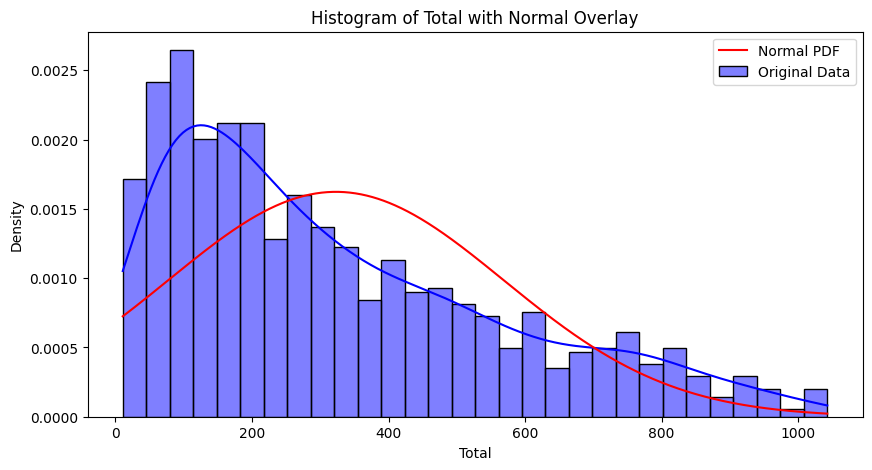

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=30, kde=True, color='blue', stat='density', label="Original Data")
x = np.linspace(min(data), max(data), 1000)
pdf_values = norm.pdf(x, mean_value, std_dev)
plt.plot(x, pdf_values, 'r', label="Normal PDF")
plt.legend()
plt.title("Histogram of Total with Normal Overlay")
plt.show()

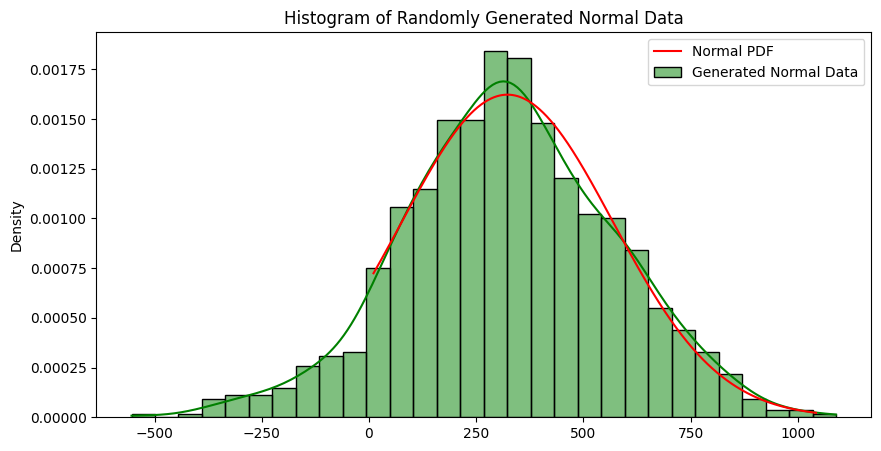

In [6]:
random_samples = np.random.normal(mean_value, std_dev, 1000)
plt.figure(figsize=(10, 5))
sns.histplot(random_samples, bins=30, kde=True, color='green', stat='density', label="Generated Normal Data")
plt.plot(x, pdf_values, 'r', label="Normal PDF")
plt.legend()
plt.title("Histogram of Randomly Generated Normal Data")
plt.show()

In [7]:
probability_below_mean = norm.cdf(mean_value, mean_value, std_dev)
print(f"P(X <= Mean): {probability_below_mean}")

P(X <= Mean): 0.5


In [8]:
percentile_95 = norm.ppf(0.95, mean_value, std_dev)
print(f"95th Percentile: {percentile_95}")

95th Percentile: 727.412134255012


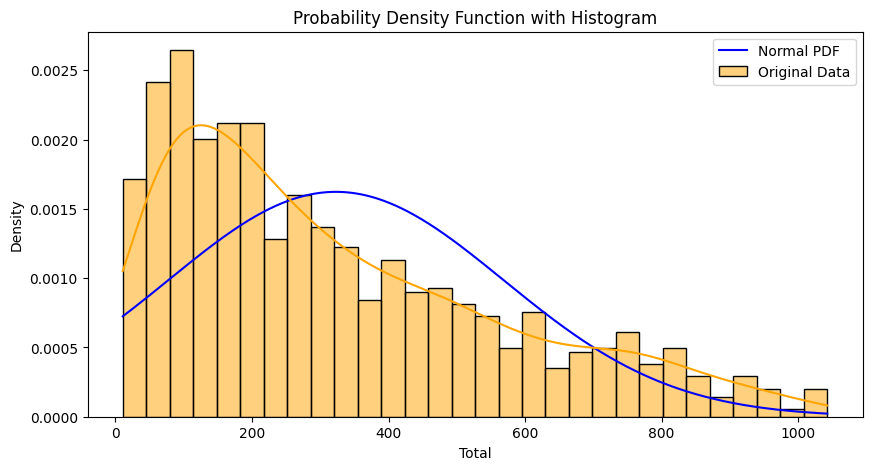

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(x, pdf_values, 'b', label="Normal PDF")
sns.histplot(data, bins=30, kde=True, color='orange', stat='density', alpha=0.5, label="Original Data")
plt.legend()
plt.title("Probability Density Function with Histogram")
plt.show()

In [ ]:
# sample_sizes = [10, 30, 50, 100, 200]
sample_sizes = np.round(df["gross income"].values).astype(int)
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(20, 5), sharey=True)
sample_means_dict = {}

for i, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(data, size, replace=True)) for _ in range(10)]
    sample_means_dict[size] = sample_means
    sns.histplot(sample_means, bins=30, kde=True, ax=axes[i], color='purple', stat='density')
    axes[i].set_title(f"Sample Size = {size}")

plt.suptitle("Histograms of Sample Means for Different Sample Sizes")
plt.show()

KeyboardInterrupt: 

In [18]:
for size, sample_means in sample_means_dict.items():
    print(f"Sample Size {size} - Skewness: {skew(sample_means)}, Kurtosis: {kurtosis(sample_means)}")

Sample Size 26 - Skewness: 0.07790597408404708, Kurtosis: -0.14441531379788364
Sample Size 4 - Skewness: 0.38882784954968913, Kurtosis: -0.03104911867853488
Sample Size 16 - Skewness: 0.12602562756485827, Kurtosis: -0.29349844690517735
Sample Size 23 - Skewness: 0.15806440493149398, Kurtosis: -0.03871510506471765
Sample Size 30 - Skewness: 0.2661085667300259, Kurtosis: 0.22450452483263117
Sample Size 21 - Skewness: 0.18931504131944285, Kurtosis: -0.1778714756168731
Sample Size 37 - Skewness: 0.02859752995656862, Kurtosis: -0.030529855405397655
Sample Size 8 - Skewness: 0.25129900042418, Kurtosis: -0.22415638164850238
Sample Size 3 - Skewness: 0.46918110429031373, Kurtosis: -0.09824479794697227
Sample Size 5 - Skewness: 0.26970125034680276, Kurtosis: -0.3484731220642914
Sample Size 12 - Skewness: 0.30477027856634775, Kurtosis: 0.35766757712883335
Sample Size 22 - Skewness: 0.17146753820504881, Kurtosis: -0.08755479227334018
Sample Size 36 - Skewness: 0.12960977222334635, Kurtosis: -0.22

In [19]:
percentile_99 = norm.ppf(0.99, mean_value, std_dev)
print(f"99th Percentile: {percentile_99}")

99th Percentile: 894.981575569966
